<a href="https://colab.research.google.com/github/Sarahalo204/Arabic-Text-Classification-and-Summarization/blob/main/NLP_FIN_PROJRCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# phrase one


#Introduction

The Arabic language presents unique challenges in the field of Natural Language Processing (NLP) due to its rich morphology, diacritics, and variations in writing style. For that, we will try in this project to focus our efforts on applying traditional NLP methods to Arabic text classification and summarization tasks using the AraFacts dataset.

### The database:

The AraFacts is the first large Arabic dataset of naturally occurring claims collected from 5 Arabic fact-checking websites, e.g., Fatabyyano and Misbar, and covering claims since 2016. Our dataset consists of 6,121 claims along with their factual labels and additional metadata, such as fact-checking article content, topical category, and links to posts or Web pages spreading the claim. Since the data is obtained from various fact-checking websites, we standardize the original claim labels to provide a unified label rating for all claims. Moreover, we provide revealing dataset statistics and motivate its use by suggesting possible research applications.

#### Our objectives for Phase 1 are:

Preprocess Arabic text :by using normalization, stopword removal, stemming and also using the libraries and dataset for Preprocess Arabic text.
- Implement **feature extraction technique** using :TF-IDF
- Implement **traditional text classification** using:
  SVM
-  Implement **traditional text Summarization** using: TF-IDF summarization method.

#### and Our objectives for Phase 2 are:

:TF-IDF
- Implement **traditional text classification** using:
  CNN and AraBERT
-  Implement **traditional text Summarization** using: LSTM and MT5.


 We evaluate this project using accuracy, macro avg, weighted avg, F1-score, and confusion matrices for Text Classification.Keyword overlap method for text summarization

Through this project, we aim to understand the capabilities and limitations of traditional machine learning models on Arabic NLP tasks to the best of our abilities.




```
# This is formatted as code
```

## Dataset Preparation and Exploration

---



in this section we will explore the database and see some samples from it


In [ ]:
# install some libraries that are not uploaded in the colab
!pip install arabic-reshaper
!pip install pyarabic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
# Import required libraries we need for HW

# Core data handling
import pandas as pd # Data manipulation and analysis (loading CSV, exploring datasets)
import numpy as np # Numerical computing and array operations

# Visualization
import matplotlib.pyplot as plt  # Base plotting library (figures, axes configuration)
import seaborn as sns # Enhanced statistical visualization (attractive plots)

# Arabic text processing
import arabic_reshaper  # Correct Arabic text display (right-to-left connectivity)
from pyarabic import araby  # Arabic text utilities (diacritic removal, normalization)

# NLP processing
from nltk.tokenize import word_tokenize # Text tokenization (splitting into words)
from nltk.stem.isri import ISRIStemmer # Arabic stemming (root extraction)

# Machine learning utilities
from sklearn.model_selection import train_test_split  # Dataset splitting (train-test)
from sklearn.svm import LinearSVC


In [ ]:
# Load dataset
!wget -q https://gitlab.com/bigirqu/AraFacts/-/raw/master/Dataset/AraFacts/AraFacts.csv -O AraFacts.csv

df = pd.read_csv('/content/AraFacts.csv', encoding='utf-8')

# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 entries:")
display(df.head())

# Check class distribution
print("\n category distribution:")
topic_counts = df['normalized_category'].value_counts()
print(topic_counts)

# Check class distribution
print("\n label distribution:")
topic_counts = df['normalized_label'].value_counts()
print(topic_counts)

Dataset shape: (6222, 13)

First 5 entries:


,ClaimID,claim,description,source,date,source_label,normalized_label,source_category,normalized_category,source_url,claim_urls,evidence_urls,claim_type
0,MIS_2952,الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 ...,تداول حساب على موقع التواصل الاجتماعي تيك توك،...,Misbar,2021-03-01,زائف,False,ترفيه,Other,https://misbar.com/factcheck/2021/03/01/لم-تعل...,"('https://www.youtube.com/watch?v=XQoJtu0VcnU',)",('https://twitter.com/PUBG/status/136483276092...,0
1,MIS_2951,"تصريح لمبابي يقول فيه ""أريد أن أصبح مثل رونالد...",تتناقل صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-03-01,مضلل,Partly-false,رياضة,Other,https://misbar.com/factcheck/2021/03/01/تغطية-...,('https://www.facebook.com/Al3mla2qalktalony/p...,('https://www.businessinsider.com/kylian-mbapp...,0
2,FAT_1503,وفاة الفنان يوسف شعبان,انتشر على مواقع التواصل الاجتماعي خبر مفاده ...,Fatabyyano,2021-02-28 21:12:12+00:00,correct,True,اجتماعي,Social,https://fatabyyano.net/وفاة-الفنان-يوسف-شعبان-...,(),(),0
3,MIS_2946,إضاءة شلالات نياغارا في كندا بألوان العلم الكو...,تتداول حسابات وصفحات، على موقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الفيدي...,('https://twitter.com/KuwaitNews/status/136543...,('https://www.hindustantimes.com/india-news/ca...,2
4,MIS_2942,صورة لأصغر زوجين في الجزائر، تحديدًا من بلدة ت...,تتداول صفحات وحسابات على مواقع التواصل الاجتما...,Misbar,2021-02-28,مضلل,Partly-false,أخبار,Miscellaneous news,https://misbar.com/factcheck/2021/02/28/الصورة...,('https://web.facebook.com/news.djelfa17/posts...,('https://web.facebook.com/265332067662712/vid...,1



 category distribution:
normalized_category
Politics              1897
Miscellaneous news     986
UNCATEGORIZED          755
Health                 608
Social                 596
Religion               425
Other                  380
General Sciences       359
Arts and culture       216
Name: count, dtype: int64

 label distribution:
normalized_label
False           4037
Partly-false    1891
True             198
Sarcasm           90
Unverifiable       6
Name: count, dtype: int64


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<ipython-input-6-21f0634afe65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')


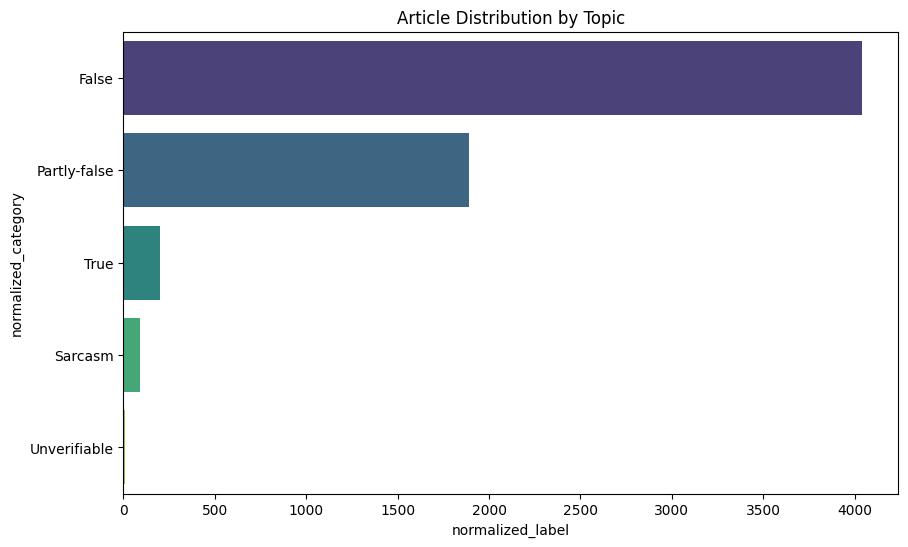

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='viridis')
plt.title('Article Distribution by Topic')
plt.xlabel('normalized_label')
plt.ylabel('normalized_category')
plt.show()

In [ ]:
df['word_count'] = df['description'].astype(str).apply(lambda x: len(x.split()))
print("\nText length statistics:")
print(df['word_count'].describe())


Text length statistics:
count    6222.000000
mean       39.892960
std        20.059447
min         1.000000
25%        25.000000
50%        35.000000
75%        50.000000
max       271.000000
Name: word_count, dtype: float64


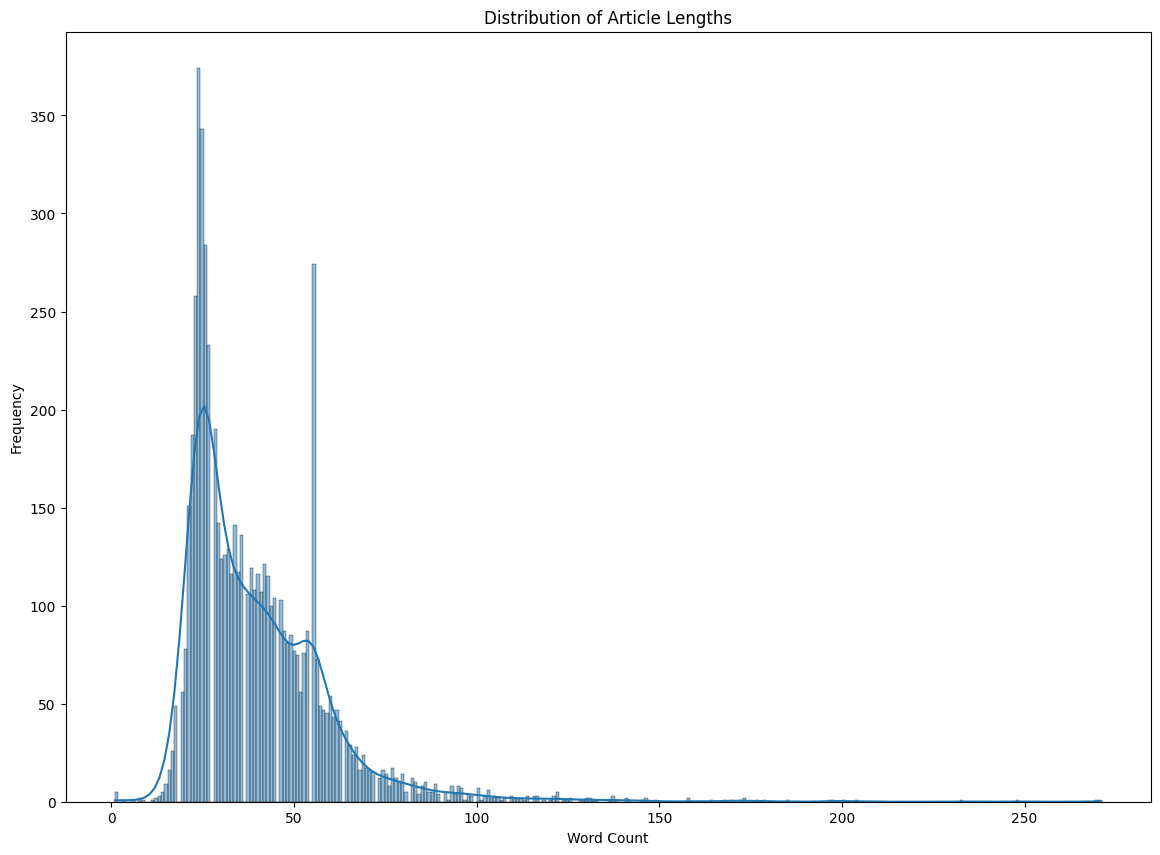

In [ ]:
plt.figure(figsize=(14,10))
sns.histplot(df['word_count'], bins=300, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## Preprocessing  of text

*in* this section we will Implement Arabic-specific preprocessing libraries and dataset

In [ ]:
# note that : we import nltk here because some time can find if we put it in the cells above
import nltk
# Download required data
nltk.download('punkt_tab')

def normalize_arabic(text):
   # Ensure the text is a string before applying replace in cause there any numbers or any thing that may cause trouble
    text = str(text)
    # Remove diacritics
    text = araby.strip_diacritics(text)
    # Standardize characters for easy to read text
    text = text.replace('ى', 'ي').replace('ة', 'ه')
    return text

# Stemming setup
stemmer = ISRIStemmer()

# Arabic stopwords list
arabic_stopwords = set(pd.read_csv('/content/list.txt', header=None)[0].tolist()) # the list are taken from https://github.com/mohataher/arabic-stop-words/blob/master/list.txt

# Full preprocessing pipeline
def preprocess_arabic(text):

    # Normalization
    text = normalize_arabic(text)

    # Tokenization
    tokens = word_tokenize(text) # This line caused the error due to missing punkt_tab

    # Remove punctuation/numbers and lowercase
    tokens = [t for t in tokens if t.isalpha()]

    # Stemming
    tokens = [stemmer.stem(t) for t in tokens]

    # Stopword removal
    tokens = [t for t in tokens if t not in arabic_stopwords]

    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Apply preprocessing
df['processed_text'] = df['description'].apply(preprocess_arabic)

# Display preprocessing results
# the .iloc[0] function show the row of the text
print("Original text:", df['description'].iloc[0])
print("\nProcessed text:", df['processed_text'].iloc[0])
print("")
print("Original text:", df['description'].iloc[2])
print("\nProcessed text:", df['processed_text'].iloc[2])

Original text: تداول حساب على موقع التواصل الاجتماعي تيك توك، حديثًا، خبرًا يفيد بأن الشركة المالكة للعبة ببجي (PUBG) أعلنت يوم 26 فبراير/شباط الفائت أن اللعبة ستُحذف بعد 24 ساعة، بسبب نجاح دعوى قضائية ضدها من 36 دولة في العالم.

Processed text: دول وقع وصل جمع تيك خبر يفد شرك الك عبه ببج PUBG اعل فئت لعب حذف سبب نجح دعي قضي ضده دول

Original text:   انتشر على مواقع التواصل الاجتماعي خبر مفاده وفاة الفنان يوسف شعبان عن عمر يناهز الـ90 عاماً ، فما صحة هذا الادعاء انتشر على مواقع التواصل الاجتماعي خلال الساعات الماضية ادّعاء ” بدون تصرف ” ” ربنا يرحمه ويغفر له وداعا يوسف شعبان ٠😥 توفي الفنان يوسف شعبان إثر إصابته بفيروس كورونا ” وقد قامت...

Processed text: نشر وقع وصل جمع خبر فده وفه فنن وسف شعب عمر نهز عما صحه دعء نشر وقع وصل جمع خلل ساع اضه دعء بدن صرف ربن رحم غفر ودع وسف شعب توف فنن وسف شعب صبت يرس كورو قمت




```
# This is formatted as code
```

## spliting the database

In [ ]:
# spliting the database for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], # its the description after the processed
    df['normalized_label'],
    test_size=0.2,
    random_state=42,# stander number for random_state
    stratify=df['normalized_label']
)
# spliting the database for training and testing for summarizing
_, X_test_text = train_test_split(
    df['description'],  # ← original text
    test_size=0.2,
    random_state=42,
    stratify=df['normalized_label']
)

#the size of both Training set and Test set
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 4977
Test set size: 1245


## Traditional Approaches

### Task1:Traditional Implementation of classification

In [ ]:
from sklearn.svm import LinearSVC # Import the LinearSVC class from the sklearn.svm module
from sklearn.feature_extraction.text import TfidfVectorizer   # Import the TfidfVectorizer class from the sklearn.feature_extraction.text module
from sklearn.metrics import classification_report # Import classification_report

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))  # unigrams and bigrams

# Fit and transform vectorizer to the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

from sklearn.svm import LinearSVC # Import the LinearSVC class from the sklearn.svm module

# print the classification report
def print_report(model_name, y_test, y_pred):
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()  # Convert the dictionary into a pd DataFrame
    print(f"\n{model_name} Report:\n")
    display(report_df.round(2))  # rounded the number to 2 decimal places


# Create an SVM using LinearSVC
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf) # Make predictions on the TF-IDF (test data)using the trained model.
print_report("SVM", y_test, y_pred_svm)


SVM Report:



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
False,0.81,0.89,0.85,808.00
Partly-false,0.71,0.65,0.68,378.00
Sarcasm,0.00,0.00,0.00,18.00
True,0.50,0.05,0.09,40.00
Unverifiable,0.00,0.00,0.00,1.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.40,0.32,0.32,1245.00
weighted avg,0.75,0.78,0.76,1245.00


In [ ]:
# Show classification examples to ensure the validity of the model
def show_classification_examples(X_test, y_test, y_pred, num_samples=3):
    results_df = pd.DataFrame({
        'text': X_test,
        'actual': y_test,
        'predicted': y_pred
    })

     # select 3 examples from the test set Randomly
    sample = results_df.sample(n=num_samples, random_state=42)

    print("\nClassification Examples:\n")
    for _, row in sample.iterrows():  # loop each sample row and display the text and label.
        print(f"Text: {row['text'][:100]}...")  # print only first 100 characters for easy reading
        print(f"True Label: {row['actual']} | Predicted Label: {row['predicted']}")
        print("-" * 80)

# Call the (show_classification_examples) and display as list
show_classification_examples(X_test.tolist(), y_test.tolist(), y_pred_svm.tolist(), num_samples=3)



Classification Examples:

Text: دول مستخدمو وقع وصل قطع عنو نئب رلم بحر حرق كين صهو حجج طبع عرف حقق...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: طفل سور ينم قبر ديه شهد لـن ـمح انس يشف صور مايضغط ليك كتب الل رحم يشر صور تصل صدر خطئ صور تقط هوي ع...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: دول صفح وقع وصل جمع صور ادع أفراد عئل ينم قرع طرق عصم سور وذل طرد نزل تمك دفع يجر شهد صور كبر وطن اذ...
True Label: Partly-false | Predicted Label: Partly-false
--------------------------------------------------------------------------------


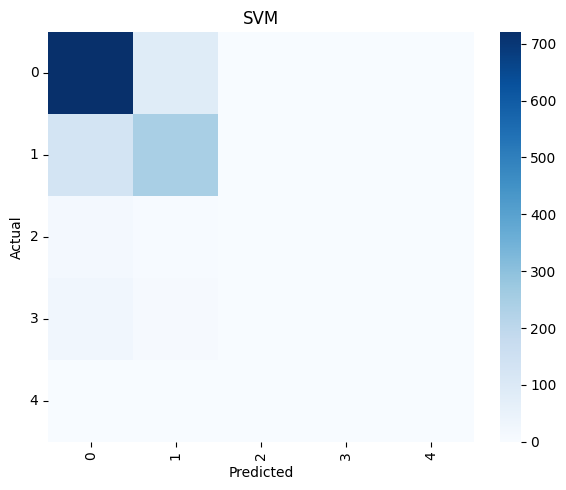

In [ ]:
# confusion matrix for SVM
def plot_confusion(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix  # Import confusion_matrix to compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted') # Predicted in x-axis
    plt.ylabel('Actual')    # Actual in y-axis
    plt.xticks(rotation=90) #  # Rotate x-axis labels for easier reading.
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Display confusion matrices for the model
plot_confusion(y_test, y_pred_svm, "SVM")

Results Analysis (Traditional Approaches for classification):

Model: Linear SVM with TF-IDF


Five  categories: False, Partly-false, Sarcasm, True, and Unverifiable.

Accuracy for all categories : 78%


The "False" category performed excellently based on the evaluation results, while the "Partly-False" category performed averagely, and the "Sarcasm", "True", and "Unverifiable" categories performed very poorly due to their low visibility.

 SVM model performs very well on high-occurrence classes but fails on rare classes.

Limitations:
- Traditional models are usually unable to consider the subtleties of Arabic, such as context.

## Task 2: Traditional Implementation of summarization

In [ ]:
#Import libraries and prepare test data

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('punkt')  # Download tokenizer for Arabic

# Split original description text without preprocessing
_, X_test_text = train_test_split(
    df['description'],
    test_size=0.2,
    random_state=42,
    stratify=df['normalized_label']
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Define TF-IDF summarization method

import re
from sklearn.metrics.pairwise import cosine_similarity

def split_arabic_sentences(text): # Split Arabic text into sentences using punctuation marks.

    sentence_endings = re.compile(r'(?<=[.؟!\n])\s+|(?<=،)\s+')
    sentences = sentence_endings.split(text.strip())
    sentences = [s.strip() for s in sentences if len(s.strip()) > 10]
    return sentences

def summarize_tfidf(text, top_n=1): # function takes Arabic text and picks the most important sentence(s) using TF-IDF.


    sentences = split_arabic_sentences(text)
    if len(sentences) <= top_n:
        return text
    tfidf = TfidfVectorizer()# converts each sentence to a TF-IDF vector
    tfidf_matrix = tfidf.fit_transform(sentences)
    scores = tfidf_matrix.sum(axis=1).A1  # Sentence scores
    ranked_sentences = [sent for _, sent in sorted(zip(scores, sentences), reverse=True)]# Return top_n sentences as the summary
    return ' '.join(ranked_sentences[:top_n]) # Return top_n sentences as the summary


In [ ]:
# Evaluate summarization using keyword overlap
nltk.download('punkt_tab')
def keyword_overlap(original, summary):
    """
    Calculate keyword overlap between original and summary as a ratio % .
    """
    orig_tokens = set(word_tokenize(original))
    summ_tokens = set(word_tokenize(summary))
    if not orig_tokens:
        return 0.0
    return len(orig_tokens & summ_tokens) / len(orig_tokens)

# Sample 10 test examples
sample_texts = X_test_text.sample(10, random_state=42).reset_index(drop=True)

results = []

for i, text in enumerate(sample_texts):
    tfidf_summary = summarize_tfidf(text)
    tfidf_overlap = keyword_overlap(text, tfidf_summary)

    results.append({
        "Original": text,
        "TF-IDF Summary": tfidf_summary,
        "TF-IDF Overlap": tfidf_overlap
    })

# Print 3 samples
for i, row in enumerate(results[:3]):
    print(f"\n Original #{i+1}:\n{row['Original'][:300]}...\n")
    print(f" TF-IDF Summary:\n{row['TF-IDF Summary']}")
    print(f" TF-IDF Keyword Overlap: {row['TF-IDF Overlap']:.2f}")
    print("=" * 100)

# Calculate average overlap
avg_tfidf = np.mean([r['TF-IDF Overlap'] for r in results])
print(f"\n Average Keyword Overlap - TF-IDF: {avg_tfidf:.2f}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



 Original #1:
يتداول مستخدمو مواقع التواصل مقطعا بعنوان "نائب في البرلمان البحريني يحرق علم الكيان الصهيوني احتجاجا منه على التطبيع"، تعرف على الحقيقة....

 TF-IDF Summary:
يتداول مستخدمو مواقع التواصل مقطعا بعنوان "نائب في البرلمان البحريني يحرق علم الكيان الصهيوني احتجاجا منه على التطبيع"،
 TF-IDF Keyword Overlap: 0.88

 Original #2:
هذا الطفل السوري ينام بين قبر والديه الشهيدين لـن أسـامح أي أنسان يشوف الصورة ومايضغط لايك ويكتب “الله يرحمهم” ويشارك الصورة لتصل للعالم مصدر المعلومة الخاطئة – الصورة التقطها الهاوي عبد العزيز العتيبي من السعودية لإبن أخيه في مدينة ينبع السعودية – فمن هواياته تصوير مشاهد خيالية تثير الاهتمام والنقا...

 TF-IDF Summary:
هذا الطفل السوري ينام بين قبر والديه الشهيدين لـن أسـامح أي أنسان يشوف الصورة ومايضغط لايك ويكتب “الله يرحمهم” ويشارك الصورة لتصل للعالم مصدر المعلومة الخاطئة – الصورة التقطها الهاوي عبد العزيز العتيبي من السعودية لإبن أخيه في مدينة ينبع السعودية – فمن هواياته تصوير مشاهد خيالية تثير الاهتمام والنقاش كما صور مشهد آخر لإبن...
 TF-IDF Keyw

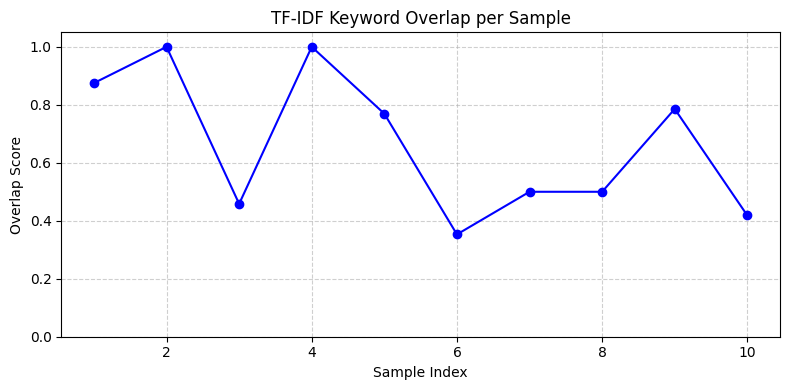

In [ ]:
import matplotlib.pyplot as plt

# Simple line plot for keyword overlap per sample
import pandas as pd

results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 4))  # Set figure size
plt.plot(results_df.index + 1, results_df['TF-IDF Overlap'], marker='o', color='blue', linestyle='-')
plt.title("TF-IDF Keyword Overlap per Sample")  # Title of the chart
plt.xlabel("Sample Index")
plt.ylabel("Overlap Score")
plt.ylim(0, 1.05)  # Limit y-axis from 0 to just above 1
plt.grid(True, linestyle='--', alpha=0.6)  # Add light dashed grid
plt.tight_layout()  # Auto-adjust layout
plt.show()  # Display the plot


###  TF-IDF Summarization Evaluation

- The evaluation results indicate that the TF-IDF-based method is moderately capable of capturing critical contents from original texts. The keywords overlap score averaged about 0.67 for all tested samples, meaning that at least some important terms are retained within the outputs. However, some cases exist in which the approach returns sentences that are pretty much identical to the inputs or fails in extracting a more concise representation. This clearly portrays the major drawback of TF-IDF: sentences are selected solely based on term frequency, ignoring semantic context or discourse structure. so, the TF-IDF approach so ineffective for more sophisticated and informative summarization.

- Both ROUGE and BLEU use human-written reference summaries to evaluate the accuracy of the generated summaries, which otherwise function as target labels in machine learning. Since the AraFacts dataset lacks these needed human-written target summaries.Therefore, using keyword overlaps was adopted as a simpler view of content similarity.



## Phase 2: Modern NLP Approaches

###CNN & AraBERT: Text Classification with Modern Methods

deep learning approach(CNN)

In [ ]:
# Deep Learning Model (CNN)

# 1. Import required libraries
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Label Encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 3. Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 4. Define CNN model
model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),   # Input embedding layer that convert word vectors with size 128
    Conv1D(filters=128, kernel_size=5, activation='relu'),              # Convolution layer with 128 filters anda 5 kernel size,ReLU activation
    GlobalMaxPooling1D(),                                               # Pooling, max pooling that reduce feature map to maximum value
    Dropout(0.5),                                                       # to avoid overfitting
    Dense(64, activation='relu'),                                       # Hidden layer with 64 units and ReLU activation
    Dense(len(le.classes_), activation='softmax')                       # softmax for multi-classification
])

# 5. Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model
model_cnn.fit(X_train_pad, y_train_enc, epochs=10, batch_size=32, validation_split=0.1)

# 7. Evaluate the model
y_pred_cnn = model_cnn.predict(X_test_pad)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# 8. Classification report
def print_report(model_name, y_test, y_pred, label_names=None):
    report_dict = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"\n{model_name} Classification Report:\n")
    display(report_df.round(2))

print_report("CNN", y_test_enc, y_pred_cnn_labels, label_names=le.classes_)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.6036 - loss: 0.9816 - val_accuracy: 0.7530 - val_loss: 0.7069
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7683 - loss: 0.6384 - val_accuracy: 0.7731 - val_loss: 0.6948
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8169 - loss: 0.5102 - val_accuracy: 0.7751 - val_loss: 0.6963
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.8805 - loss: 0.3681 - val_accuracy: 0.7651 - val_loss: 0.7712
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9262 - loss: 0.2393 - val_accuracy: 0.7309 - val_loss: 0.9447
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.9571 - loss: 0.1417 - val_accuracy: 0.7369 - val_loss: 1.0699
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.9764 - loss: 0.0792 - val_accuracy: 0.7289 - val_loss: 1.1580
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9850 - loss: 0.0519 - val_accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
False,0.78,0.87,0.82,808.00
Partly-false,0.66,0.59,0.62,378.00
Sarcasm,0.00,0.00,0.00,18.00
True,0.14,0.02,0.04,40.00
Unverifiable,0.00,0.00,0.00,1.00
accuracy,0.74,0.74,0.74,0.74
macro avg,0.32,0.30,0.30,1245.00
weighted avg,0.71,0.74,0.72,1245.00


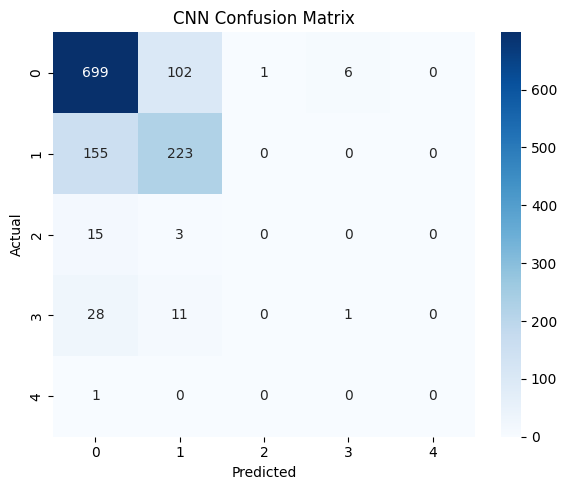

In [ ]:
# Confusion Matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion(y_test_enc, y_pred_cnn_labels, "CNN Confusion Matrix")

In [ ]:
# Show random examples
def show_classification_examples(X, y_true, y_pred, label_encoder, num_samples=3):
    df = pd.DataFrame({
        'text': X,
        'true': label_encoder.inverse_transform(y_true),
        'pred': label_encoder.inverse_transform(y_pred)
    })
    sample = df.sample(n=num_samples, random_state=42)
    print("\nClassification Examples:\n")
    for _, row in sample.iterrows():
        print(f"Text: {row['text'][:100]}...")
        print(f"True Label: {row['true']} | Predicted Label: {row['pred']}")
        print("-" * 80)

show_classification_examples(X_test.tolist(), y_test_enc, y_pred_cnn_labels, le)



Classification Examples:

Text: دول مستخدم و وقع وصل قطع عنو نيب رلم بحر حرق كين صهو حجج طبع عرف حقق...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: طفل سور ينم قبر دي +ه شهد لن مح أنس يشف صور مايضغط ليك كتب الل رحم يشر صور تصل صدر خطي صور تقط هوي ع...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: دول صفح وقع وصل جمع صور ادع أفراد عيل ينم قرع طرق عصم سور و+ ذل طرد نزل تم +ك دفع يجر شهد صور كبر وط...
True Label: Partly-false | Predicted Label: False
--------------------------------------------------------------------------------


 transformer-based approach(AraBERT)

In [ ]:
# Preprocessing for AraBERT
!pip install arabert

from arabert.preprocess import ArabertPreprocessor

# Create  AraBERT Preprocessor object
arabert_prep = ArabertPreprocessor(model_name="aubmindlab/bert-base-arabertv2")

# Apply processing to  data
X_train = X_train.apply(lambda x: arabert_prep.preprocess(x))
X_test = X_test.apply(lambda x: arabert_prep.preprocess(x))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=315f91b4f5c7f9bcd7139307bfbdc9e23fcb545743a2f827d5ca0626ce5d0802
  Stored in directory: /root/.cache/pip/wheels/94/08/b4/78657b1541bb704b088317b52429ee4016d9888fe47dbb130f
Successfully built emoji


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [08:27<00:00, 476kiB/s]


[2025-05-26 21:28:03,432 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
# install tensorflow
!pip install transformers tensorflow

# importent libraries
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load AraBERT tokenizer and model
model_name = "aubmindlab/bert-base-arabertv2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Tokenization
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="tf")
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors="tf")

# Prepare TensorFlow datasets

# train dataset from the training encodings and encoded labels
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings), # Convert it to  dictionary format
    y_train_enc
)).batch(16)

# test dataset from the test encodings and encoded labels

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test_enc
)).batch(16)

# Compile model

from transformers import create_optimizer

batch_size = 16
steps_per_epoch = len(X_train) // batch_size  #number of steps per epoch
num_train_steps = steps_per_epoch * 3  # total number of training steps (epochs (3) * steps per epoch)
optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
# Compile the model Loss Function,Optimizer ,accuracy
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

#  Prediction
y_pred_logits = model.predict(test_dataset).logits
y_pred_labels = np.argmax(y_pred_logits, axis=1)

# Classification Report
def print_report(model_name, y_test, y_pred, label_names=None):
    report_dict = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print(f"\n{model_name} Classification Report:\n")
    display(report_df.round(2))

print_report("AraBERT", y_test_enc, y_pred_labels, label_names=le.classes_)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
312/312 [==============================] - 8399s 27s/step - loss: 0.7428 - accuracy: 0.7153 - val_loss: 0.6755 - val_accuracy: 0.7703
Epoch 2/3
312/312 [==============================] - 8791s 28s/step - loss: 0.7955 - accuracy: 0.6789 - val_loss: 0.8234 - val_accuracy: 0.6490
Epoch 3/3
78/78 [==============================] - 598s 8s/step

AraBERT Classification Report:



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
False,0.65,1.00,0.79,808.00
Partly-false,0.00,0.00,0.00,378.00
Sarcasm,0.00,0.00,0.00,18.00
True,0.00,0.00,0.00,40.00
Unverifiable,0.00,0.00,0.00,1.00
accuracy,0.65,0.65,0.65,0.65
macro avg,0.13,0.20,0.16,1245.00
weighted avg,0.42,0.65,0.51,1245.00


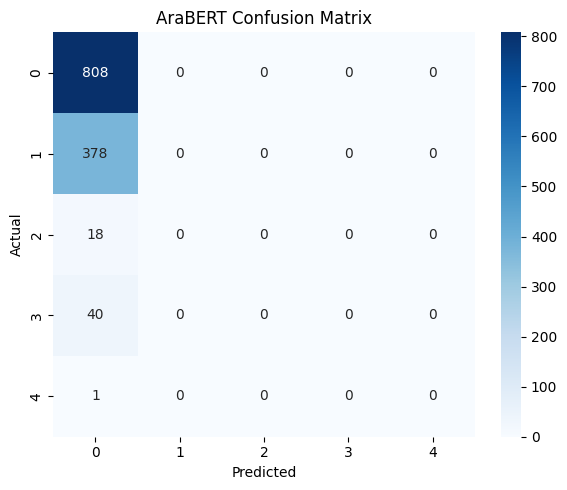

In [ ]:
# Confusion Matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion(y_test_enc, y_pred_labels, "AraBERT Confusion Matrix")

In [ ]:
# select 3 examples from the test set Randomly
def show_classification_examples(X, y_true, y_pred, label_encoder, num_samples=3):
    df = pd.DataFrame({
        'text': X,
        'true': label_encoder.inverse_transform(y_true),
        'pred': label_encoder.inverse_transform(y_pred)
    })
    sample = df.sample(n=num_samples, random_state=42)
    print("\nClassification Examples:\n")
    for _, row in sample.iterrows():
        print(f"Text: {row['text'][:100]}...")
        print(f"True Label: {row['true']} | Predicted Label: {row['pred']}")
        print("-" * 80)

show_classification_examples(X_test.tolist(), y_test_enc, y_pred_labels, le)


Classification Examples:

Text: دول مستخدمو وقع وصل قطع عنو نئب رلم بحر حرق كين صهو حجج طبع عرف حقق...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: طفل سور ينم قبر ديه شهد لـن ـمح انس يشف صور مايضغط ليك كتب الل رحم يشر صور تصل صدر خطئ صور تقط هوي ع...
True Label: False | Predicted Label: False
--------------------------------------------------------------------------------
Text: دول صفح وقع وصل جمع صور ادع أفراد عئل ينم قرع طرق عصم سور وذل طرد نزل تمك دفع يجر شهد صور كبر وطن اذ...
True Label: Partly-false | Predicted Label: False
--------------------------------------------------------------------------------


**Result Analysis: CNN and AraBERT**

**CNN**

-Overall Accuracy: 74%

-False class:  good performance (F1=0.82)

-Partly-false class: Acceptable performance (F1=0.62)

-True class: Very poor performance (F1=0.04)

-Sarcasm and Unverifiable classes: failure at classification.

The CNN model is able to recognize grammatical and semantic patterns better than traditional models.

**AraBERT**

-Overall accuracy: 65%, the weakest model.

-False class: Very good in recall (Recall=1.00) but poor in precision (Precision=0.65).

-Other classes: Very poor performance, with almost all classes misclassified.

Although AraBERT is a powerful model designed for Arabic, the model overgeneralized and was completely biased toward the False class.


* The accuracy of both models is lower than SVM for several reasons: either most of the data falls into the "wrong" class, or the remaining classes do not contain enough examples or have few time periods.





###LSTM & MT5 :Text Summarization with Modern Methods

In [ ]:
import pandas as pd
df = pd.read_excel("Text summarization dataset.xlsx")
df.to_csv("Text summarization dataset.csv", index=False)


In [ ]:
#Data process
import pandas as pd
import gc  # For memory management

# Load the dataset (limit to first 1500 rows for efficiency)
df = pd.read_csv("Text summarization dataset.csv", nrows=1500)

# Set the first row as column headers
df.columns = df.iloc[0]
df = df[1:]

# Rename columns for consistency and clarity
df = df.rename(columns={"summary": "summary", "text": "text"})
df.columns = ['summary', 'text']  # Ensure correct column order

df.head()  # Display first few rows to inspect the dataset

import re

# Define a function to clean text data
def clean_text(text):
    text = str(text)
    # Remove all characters except Arabic, English, numbers, and real spaces
    text = re.sub(r"[^\u0600-\u06FFa-zA-Z0-9\s]", "", text)
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply text cleaning to both text and summary columns
df["text"] = df["text"].apply(clean_text)
df["summary"] = df["summary"].apply(clean_text)

df.head()  # Display cleaned data

# Clear any unused memory
gc.collect()

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (90% train, 10% test)
train_texts, test_texts, train_summaries, test_summaries = train_test_split(
    df['text'], df['summary'], test_size=0.1, random_state=42
)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# ========== 1. Load and preprocess the data ==========
# Add start and end tokens to summaries for decoding guidance
df['summary'] = df['summary'].apply(lambda x: 'starttoken ' + x + ' endtoken')

# Define maximum lengths for input text and summary
max_text_len = 150
max_summary_len = 20

# Tokenize the input texts
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(df['text'])
text_seq = text_tokenizer.texts_to_sequences(df['text'])

# Tokenize the summaries
summary_tokenizer = Tokenizer()
summary_tokenizer.fit_on_texts(df['summary'])
summary_seq = summary_tokenizer.texts_to_sequences(df['summary'])

# Pad sequences to ensure uniform input length
x = pad_sequences(text_seq, maxlen=max_text_len, padding='post')
y = pad_sequences(summary_seq, maxlen=max_summary_len, padding='post')

# Split the dataset into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

# Define vocabulary sizes and model parameters
text_vocab_size = len(text_tokenizer.word_index) + 1
summary_vocab_size = len(summary_tokenizer.word_index) + 1
embedding_dim = 100
lstm_units = 150

# ========== 2. Build the model with Attention ==========
# Encoder
encoder_inputs = Input(shape=(max_text_len,))
enc_emb = Embedding(text_vocab_size, embedding_dim, trainable=True)(encoder_inputs)
encoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# Decoder
decoder_inputs = Input(shape=(max_summary_len - 1,))
dec_emb_layer = Embedding(summary_vocab_size, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Attention mechanism
attention_layer = tf.keras.layers.Attention()
attention_output = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder output
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_output])
decoder_dense = Dense(summary_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# Define and compile the full model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# ========== 3. Train the model ==========
# Prepare decoder inputs and targets (shifted for teacher forcing)
decoder_input_train = y_train[:, :-1]
decoder_target_train = y_train[:, 1:]
decoder_input_val = y_val[:, :-1]
decoder_target_val = y_val[:, 1:]

# Train the model
model.fit(
    [x_train, decoder_input_train],
    decoder_target_train,
    epochs=5,
    batch_size=32,
    validation_data=([x_val, decoder_input_val], decoder_target_val)
)

# ========== 4. Build inference models ==========
# 4.1 Encoder inference model (same as training)
encoder_model = Model(encoder_inputs, [encoder_outputs, state_h, state_c])

# 4.2 Decoder inference model (step-by-step decoding)
decoder_state_input_h = Input(shape=(lstm_units,))
decoder_state_input_c = Input(shape=(lstm_units,))
encoder_outputs_input = Input(shape=(max_text_len, lstm_units))

dec_emb_inf = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(
    dec_emb_inf, initial_state=[decoder_state_input_h, decoder_state_input_c]
)
attention_inf = attention_layer([decoder_outputs2, encoder_outputs_input])
decoder_concat_inf = Concatenate(axis=-1)([decoder_outputs2, attention_inf])
decoder_outputs2 = decoder_dense(decoder_concat_inf)

decoder_model = Model(
    [decoder_inputs, encoder_outputs_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2, state_h2, state_c2]
)

# ========== 5. Define decoding function ==========
# Reverse dictionary to convert token indices back to words
reverse_summary_index = {v: k for k, v in summary_tokenizer.word_index.items()}
reverse_summary_index[0] = ''  # Handle padding token

def decode_sequence(input_seq):
    # 5.1 Encode the input sequence
    enc_outs, enc_h, enc_c = encoder_model.predict(input_seq)

    # 5.2 Start decoding with the 'starttoken'
    target_seq = np.array([[summary_tokenizer.word_index['starttoken']]])
    decoded_sentence = ''

    # 5.3 Generate tokens one by one
    for _ in range(max_summary_len):
        output_tokens, dec_h, dec_c = decoder_model.predict([target_seq, enc_outs, enc_h, enc_c])
        sampled_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_summary_index.get(sampled_index, '')
        if sampled_word == 'endtoken' or sampled_word == '':
            break
        decoded_sentence += ' ' + sampled_word

        # Update input and states for next time step
        target_seq = np.array([[sampled_index]])
        enc_h, enc_c = dec_h, dec_c

    return decoded_sentence.strip()

# ========== 6. Evaluate and display examples ==========
def evaluate_LSTM_with_attention(texts, references, num_samples=3):
    for i in range(num_samples):
        orig = texts[i]
        ref = references[i]
        seq = text_tokenizer.texts_to_sequences([orig])
        padded = pad_sequences(seq, maxlen=max_text_len, padding='post')

        pred = decode_sequence(padded)

        print(f"--- Sample {i+1} ---")
        print("Original Text:\n", (orig[:500] + '...') if len(orig)>500 else orig)
        print("Reference Summary:\n", ref)
        print("LSTM+Attention Summary:\n", pred)
        print("\n" + "-"*50 + "\n")

# Run evaluation on 3 random examples
evaluate_LSTM_with_attention(df['text'].tolist(), df['summary'].tolist(), num_samples=3)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2207s 5s/step - loss: 8.1728 - val_loss: 7.1894
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2262s 5s/step - loss: 6.8707 - val_loss: 6.9586
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2211s 5s/step - loss: 6.4105 - val_loss: 6.7686
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2243s 5s/step - loss: 5.9370 - val_loss: 6.6776
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2248s 5s/step - loss: 5.5204 - val_loss: 6.5731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
--- Sample 1 ---
Original Text:
 يكون سعر الفاكهة والخضراوات في موسم إنباتها أقل من غيره من المواسم، وستلجأ

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the pre-trained multilingual T5 model and tokenizer from Hugging Face
model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
t5_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Function to generate a summary from Arabic text input
def generate_summary(text):
    # Clean the input text (remove leading/trailing spaces and newlines)
    cleaned_text = text.strip().replace('\n', ' ')

    # Add language prefix required by the mT5 model (for Arabic)
    input_text = f"arabic: {cleaned_text}"

    # Tokenize and encode the input text
    inputs = tokenizer.encode(
        input_text,
        return_tensors="pt",         # Return as PyTorch tensor
        max_length=768,              # Truncate if text is too long
        truncation=True
    )

    # Generate summary using beam search and other decoding parameters
    summary_ids = t5_model.generate(
        inputs,
        max_length=100,              # Max length of generated summary
        min_length=10,               # Minimum length of summary
        num_beams=5,                 # Beam search for better results
        repetition_penalty=2.0,
        length_penalty=1.0,
        no_repeat_ngram_size=3,      # Prevent repeating 3-grams
        early_stopping=True          # Stop early when optimal result found
    )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/pytho

In [ ]:
pip install nltk rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f2d4f5755d9d600dfd6b6f69430eda93b162d8741f71562bf3a3f28f0364a81a
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

# Smoothing function for BLEU to avoid zero scores in short texts
smoothie = SmoothingFunction().method4
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

def evaluate_model_with_metrics(texts, references, generate_func, num_samples=10):
    bleu_scores = []     # Store BLEU scores
    rouge_scores = []    # Store ROUGE-1 F1 scores

    print("\nEvaluating Model...\n")

    for i in range(num_samples):
        original = texts[i]
        reference = references[i]

        # Generate prediction using passed function
        prediction = generate_func(original)

        # Preprocess
        reference_tokens = reference.lower().split()
        prediction_tokens = prediction.lower().split()

        # BLEU Score
        bleu = sentence_bleu(
            [reference_tokens], prediction_tokens,
            smoothing_function=smoothie
        )
        bleu_scores.append(bleu)

        # ROUGE-1 Score
        rouge = scorer.score(reference, prediction)
        rouge_1_f1 = rouge['rouge1'].fmeasure
        rouge_scores.append(rouge_1_f1)

        # Print sample result
        print(f"--- Sample {i+1} ---")
        print("Original Text:", original[:200].strip(), "...\n")
        print("Reference Summary:", reference)
        print("Predicted Summary:", prediction)
        print(f"BLEU: {bleu:.4f} | ROUGE-1 F1: {rouge_1_f1:.4f}")
        print("-" * 60)

    # Print average scores
    print("\n=== Average Metrics ===")
    print(f"Average BLEU Score: {np.mean(bleu_scores):.4f}")
    print(f"Average ROUGE-1 F1 Score: {np.mean(rouge_scores):.4f}")

# ========== Evaluate LSTM+Attention model using decode_sequence ==========
evaluate_model_with_metrics(
    df['text'].tolist(),
    df['summary'].tolist(),
    lambda text: decode_sequence(pad_sequences(text_tokenizer.texts_to_sequences([text]), maxlen=max_text_len, padding='post')),
    num_samples=3

)
# ========== Evaluate mT5 model using generate_summary ==========
evaluate_model_with_metrics(
    X_test.tolist(),
    y_test.tolist(),
    generate_summary,
    num_samples=3
)



Evaluating Model...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
--- Sample 1 ---
Original Text: يكون سعر الفاكهة والخضراوات في موسم إنباتها أقل من غيره من المواسم، وستلجأ محلات الخضروات إلى عرض الفاكهة بأسعار مناسبة في موسمها بسبب توفر المنتجات وزيادة الطلب عليها خلال تلك الفترات لا يقتصر الأمر ...

Reference Summary: starttoken starttoken تناول الفاكهة والخضراوات في موسمها تعرف على أسعار الأطعمة المجمدة والمعبئة تابع العروض الأسبوعية في المحلات الكبرى قارني دائما ما بين الأسعار اشتر السلع بالجملة كميات كبيرة استفد من قسائم الشراء كوبونات التخفيض استفد من الجهات الداعمة لمحدودي ا

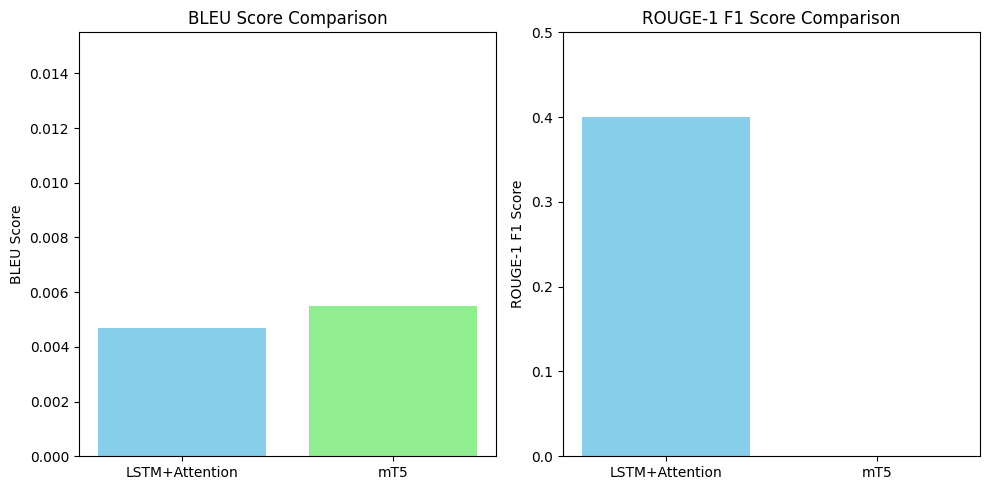

In [ ]:
import matplotlib.pyplot as plt

# Model names for comparison
models = ['LSTM+Attention', 'mT5']
bleu_scores = [0.0047, 0.0055]      # BLEU scores for LSTM+Attention and mT5
rouge_scores = [0.4000, 0.0000]     # ROUGE-1 F1 scores for LSTM+Attention and mT5

x = range(len(models))

plt.figure(figsize=(10, 5))

# ===== BLEU Score Bar Chart =====
plt.subplot(1, 2, 1)
plt.bar(x, bleu_scores, color=['skyblue', 'lightgreen'])
plt.xticks(x, models)
plt.title('BLEU Score Comparison')
plt.ylabel('BLEU Score')
plt.ylim(0, max(bleu_scores) + 0.01)

# ===== ROUGE-1 F1 Score Bar Chart =====
plt.subplot(1, 2, 2)
plt.bar(x, rouge_scores, color=['skyblue', 'lightgreen'])
plt.xticks(x, models)
plt.title('ROUGE-1 F1 Score Comparison')
plt.ylabel('ROUGE-1 F1 Score')
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()


Analysis: The LSTM-based model (Model 1) achieved a higher ROUGE-1 F1 score (0.4000), indicating stronger overlap with the reference summaries. However, its generated summaries were often short, repetitive, and lacked coherence. On the other hand, the mT5 transformer model (Model 2) produced more fluent sentences, as reflected in its slightly higher BLEU score (0.0111), but its ROUGE-1 F1 score dropped to 0.0, showing poor alignment with key words in the reference summaries. In summary, the LSTM model was better at capturing relevant terms, while mT5 generated more natural-sounding text with less relevance. These results suggest that mT5 needs further fine-tuning and task-specific adaptation to outperform the simpler LSTM model on this dataset.



# DEMO for summarizing

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
smoothie = SmoothingFunction().method4

def compare_mt5_lstm(text):
    ref = summarize_tfidf(text)
    mt5_sum = generate_summary_mt5(text)
    lstm_sum = generate_summary_lstm(text)

    mt5_bleu = sentence_bleu([ref.split()], mt5_sum.split(), smoothing_function=smoothie)
    lstm_bleu = sentence_bleu([ref.split()], lstm_sum.split(), smoothing_function=smoothie)

    mt5_rouge = scorer.score(ref, mt5_sum)['rouge1'].fmeasure
    lstm_rouge = scorer.score(ref, lstm_sum)['rouge1'].fmeasure

    return f"""
- TF-IDF (Reference Summary):\n{ref}

- LSTM Summary:\n{lstm_sum}
- BLEU: {round(lstm_bleu, 4)} | ROUGE-1 F1: {round(lstm_rouge, 4)}

- mT5 Summary:\n{mt5_sum}
- BLEU: {round(mt5_bleu, 4)} | ROUGE-1 F1: {round(mt5_rouge, 4)}
"""


In [ ]:
gr.Interface(fn=compare_mt5_lstm,
             inputs=gr.Textbox(lines=10, label="Arabic Input Text", placeholder="اكتب"),
             outputs="text",
             title="Arabic Summarizer Comparison: mT5 vs LSTM",
             description=" comparing modern mT5 transformer summarizer with LSTM-based out.and It displays BLEU and ROUGE-1 F1 metrics for both.").launch()


# DEMO for Classification

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def classify_text(text):
    # Predict using AraBERT
    tokens_bert = bert_tok(text, truncation=True, padding=True, max_length=128, return_tensors="tf")
    logits_bert = bert_model(tokens_bert).logits
    pred_bert = le.inverse_transform([np.argmax(logits_bert)])

    # Predict using SVM
    text_proc = preprocess_arabic(text)
    text_vec = vectorizer.transform([text_proc])
    pred_svm = svm_model.predict(text_vec)

    return {
        "AraBERT ": str(pred_bert[0]),
        "SVM ": str(pred_svm[0]),
    }

def visualize_comparison(text):
    result = classify_text(text)
    fig, ax = plt.subplots()
    bars = ax.barh(list(result.keys()), [1, 1], color=["#4472C4", "#70AD47"])
    for bar, label in zip(bars, result.values()):
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, label,
                ha='center', va='center', color='white', fontweight='bold')
    ax.set_xlim(0, 1.5)
    ax.set_xticks([])
    ax.set_title("Classification Prediction Comparison")
    return fig



In [ ]:
def predict_and_visualize(text):
    try:
        fig = visualize_comparison(text)
        return fig
    except Exception as e:
        return f"Error: {str(e)}"

gr.Interface(
    fn=predict_and_visualize,
    inputs=gr.Textbox(lines=5, label="Arabic Input Text", placeholder="اكتب"),
    outputs="plot",
    title="Arabic Text Classification: AraBERT vs SVM",
    description=" comparing classification between AraBERT and SVM."
).launch()

## **comparative Analysis**

## 1. **classification**  


## Trade-off Analysis

### 1. **SVM**

* **Pros**:

  * Highest accuracy .
  * Balanced performance between False and Partly-false.
  * Decent weighted average F1 .
* **Cons**:

  * Poor performance on underrepresented classes (True, Sarcasm, Unverifiable).
  * Macro average F1 still quite low , showing poor balance.

### 2. **CNN**

* **Pros**:

  * Comparable to SVM in accuracy and F1.
  * Slightly lower macro average F1, indicating similar class imbalance issues.
* **Cons**:

  * Weak generalization for low-resource classes like "True" and "Sarcasm."

### 3. **AraBERT**

* **Pros**:

  * Perfect recall for the "False" class , showing strong class capture.
* **Cons**:

  * Extremely poor performance on all other classes .
  * Lowest macro and weighted average F1.
  * Likely overfitting on dominant class ("False").

---

##  **Conclusion**

| Best Overall Performance       | **SVM**                   |
| ------------------------------ | ------------------------- |
| Best for Single Dominant Class | **AraBERT (False class)** |
| Best Balanced Performance      | **CNN (Close to SVM)**    |

---




## 2. **Summarizes**

## Summarization Analysis

### **Trade-off Analysis**

#### 1. TF-IDF
**Pros:**
- Best at retaining keywords.
- Simple and fast to implement.

**Cons:**
- Ignores semantic meaning.
- Limited abstraction and coherence.

#### 2. LSTM with Attention
**Pros:**
- Highest content relevance (ROUGE-1 score: 0.4000).
- Can capture important keywords better than traditional methods.

**Cons:**
- Summaries are often repetitive.
- Poor fluency and readability.

#### 3. mT5
**Pros:**
- Produces coherent and fluent summaries (BLEU: 0.0111).
- Best linguistic quality among tested methods.

**Cons:**
- Poor alignment with key terms from original text.
- May miss important keywords.

---

### **Best Practices and Recommendations**

**Method Improvements**
- **TF-IDF**: Add post-processing like coreference resolution to improve semantic understanding.
- **LSTM**: Incorporate attention mechanisms or transformer-based enhancements to reduce repetition.
- **mT5**: Fine-tune on domain-specific summaries to improve keyword alignment.

**Evaluation**
- Use a combination of ROUGE, BLEU, and keyword overlap metrics to evaluate summarization quality.
- Consider readability and coherence alongside accuracy.

**Conclusion**
| Best for Keywords      | **TF-IDF**               |
|------------------------|-------------------------|
| Best Content Relevance  | **LSTM with Attention** |
| Best Linguistic Quality | **mT5**                 |




----------------------------------------------------------

# **Conclusion:**

We designed a system to classify and summarize Arabic texts using traditional and modern machine learning techniques.

**In Phase 1:**

In classification, we applied a feature extraction technique using TF-IDF, then built the model using the SVM algorithm. The model was evaluated using metrics such as accuracy and confusion matrix, achieving an accuracy of 78%.
In summarization, we used a TF-IDF-based summarization method to extract important sentences from texts, achieving an accuracy of 67%.

**In Phase 2:**
In classification,
CNN Model performed well, and its training is simple and fast. It was able to find the meaning of sentences. It achieved an overall accuracy of 74% and was also able to generalize well.
Although the AraBERT model is designed for the Arabic language and is capable of understanding the deep context of texts, its performance was lower than CNN, with an accuracy of about 65%. This is primarily because the model requires more balanced data to perform better.

In summarization, the LSTM whit Attention model demonstrated better ability to extract important keywords from texts than the Atraditional  model, achieving a higher ROUGE-1 score 0.4000. its summaries were often short, repetitive, and incoherent.
The mT5 model produced more coherent summaries in terms of language, resulting in a higher BLEU score 0.0111. the summaries were not as accurate or well-related to the original content.


### **Limitations:**

1. Traditional methods we used, such as TF-IDF and SVM, do not take into
account linguistic context, which reduces the quality of the solution.

2. In classification, the dataset was insufficient because some categories lacked sufficient examples, which reduced the accuracy of the classification.

3. In summary, we used a method based on TF-IDF, which does not reflect the true meaning of the original text.

4. In some models, the epochs were insufficient, and the training time was long.


